# Exercises

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [4]:
#def get_lower_and_upper_bounds(s, m):

In [29]:
def get_upper_outliers(s, k):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [53]:
def get_lower_outliers(s, k):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    return s.apply(lambda x: max([lower_bound - x, 0]))

1. Using `lemonade.csv` dataset and focusing on continuous variables:

In [5]:
df = pd.read_csv('lemonade.csv')
df.columns = [column.lower() for column in df]
df = df.drop(columns=['date', 'day', 'price'])
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


- Use the IQR Range Rule and the upper and lower bounds to identify the **lower** outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [7]:
# IQR Range rule
q1 = df.quantile(.25)
q3 = df.quantile(.75)

iqr = q3 - q1
multiplier = 1.5

lower_bound = q1 - iqr*multiplier
upper_bound = q3 + iqr*multiplier

LOWER BOUNDS:
 temperature    16.70
rainfall        0.26
flyers          4.00
sales           5.00
dtype: float64


temperature    1
rainfall       0
flyers         1
sales          0
dtype: int64

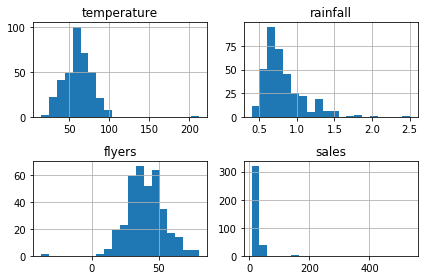

In [8]:
# distribution of variables
df.hist(bins=20)
plt.tight_layout()
# lower bounds
print('LOWER BOUNDS:\n', lower_bound)
# all unique values within the lower boudn
df[df <= lower_bound].nunique()

In [57]:
df.temperature[get_lower_outliers(df.temperature, 1.5) != 0]

364    15.1
Name: temperature, dtype: float64

In [59]:
df.rainfall[get_lower_outliers(df.rainfall, 1.5) != 0]

Series([], Name: rainfall, dtype: float64)

In [58]:
df.flyers[get_lower_outliers(df.flyers, 1.5) != 0]

324   -38
Name: flyers, dtype: int64

In [60]:
df.sales[get_lower_outliers(df.sales, 1.5) != 0]

Series([], Name: sales, dtype: int64)

In [55]:
df.temperature[get_upper_outliers(df.temperature, 1.5) != 0]

41    212.0
Name: temperature, dtype: float64

In [9]:
df[df.flyers < 0]

,temperature,rainfall,flyers,sales
324,47.0,0.95,-38,20


*Flyers shouldn't have negative values (remove)*

*Temperature has 1 lower outlier*

- Use the IQR Range Rule and the upper and lower bounds to identify the **upper** outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

UPPER BOUNDS:
 temperature    104.7
rainfall         1.3
flyers          76.0
sales           45.0
dtype: float64


temperature    1
rainfall       7
flyers         3
sales          4
dtype: int64

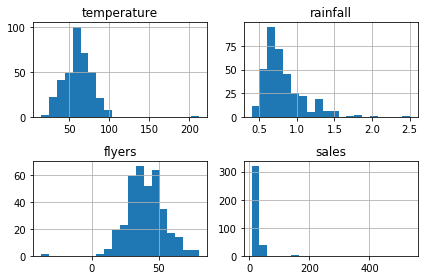

In [10]:
df.hist(bins=20)
plt.tight_layout()
print('UPPER BOUNDS:\n', upper_bound)
df[df >= upper_bound].nunique()

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the **lower** bound in each column of `lemonade.csv`. Do these lower outliers make sense? Which outliers should be kept?

In [61]:
# change multipler to 3 and reevaluate upper/lower bounds
multiplier = 3

lower_bound = q1 - iqr*multiplier
upper_bound = q3 + iqr*multiplier

LOWER BOUNDS:
 temperature   -16.30
rainfall       -0.13
flyers        -23.00
sales         -10.00
dtype: float64


temperature    0
rainfall       0
flyers         1
sales          0
dtype: int64

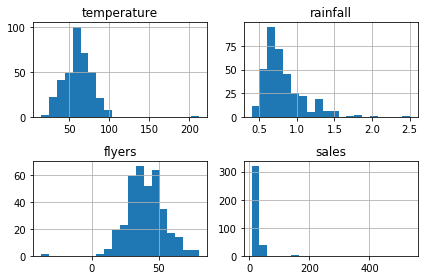

In [12]:
# distribution of variables
df.hist(bins=20)
plt.tight_layout()
# lower bounds
print('LOWER BOUNDS:\n', lower_bound)
# all unique values within the lower boudn
df[df <= lower_bound].nunique()

*only the `temperature` outlier makes any sense*

*again, `flyers` can't be negative, nor can `rainfall` and `sales` (unless sales is net revenue)*

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the **upper** bound in each column of `lemonade.csv`. Do these upper outliers make sense? Which outliers should be kept?

UPPER BOUNDS:
 temperature    137.70
rainfall         1.69
flyers         103.00
sales           60.00
dtype: float64


temperature    1
rainfall       3
flyers         0
sales          4
dtype: int64

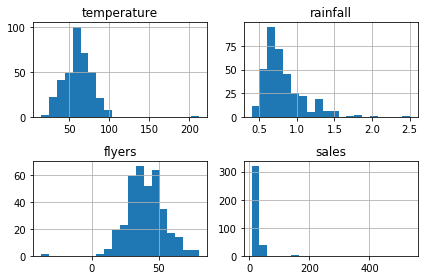

In [13]:
df.hist(bins=20)
plt.tight_layout()
print('UPPER BOUNDS:\n', upper_bound)
df[df >= upper_bound].nunique()

*`temperature` doesn't make sense because it doesn't get that hot*

*for `rainfall`, `flyers`, and `sales`, it seems to plausible, but removed since they are not likely and representative*

2. Identify if any columns in `lemonade.csv` are normally distributed. For normally distributed columns:

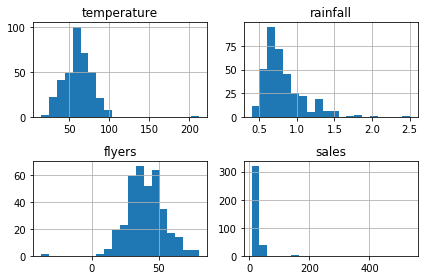

In [14]:
df.hist(bins=20)
plt.tight_layout()

*`temperature` and `flyers` are normally distributed*

*`sales` and `rainfall` are slightly skewed right*

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

In [25]:
x1 = df.temperature
zscores1 = (x1 - x1.mean()) / x1.std()

df1 = pd.DataFrame()
df1["temp"] = x1
df1["zscore"] = abs(zscores1)

df1[zscores1 >= 2]

,temp,zscore
41,212.0,8.336627
166,99.3,2.105251
176,102.6,2.287714
181,102.9,2.304301
190,98.0,2.033372
198,99.3,2.105251
202,99.6,2.121838
207,97.9,2.027843


*the 212 should be removed, we wouldn't survive water's boiling point*

*the others don't seem unusual especially in Texas*

In [26]:
x2 = df.flyers
zscores2 = (x2 - x2.mean()) / x2.std()

df2 = pd.DataFrame()
df2["flyers"] = x2
df2["zscore"] = abs(zscores2)

df2[zscores2 >= 2]

,flyers,zscore
166,77,2.676244
170,70,2.168499
171,76,2.603709
182,68,2.023429
183,68,2.023429
194,80,2.893849
198,76,2.603709
203,72,2.313569
204,69,2.095964
207,74,2.458639


*These don't seem unusual, keep them.*

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`

In [27]:
df1[zscores1 >= 3]

,temp,zscore
41,212.0,8.336627


In [28]:
df2[zscores2 >= 3]

,flyers,zscore


*same as above*